# Introduction 
In this notebook, I go over some visualizations of the iceberg data. My purpose here is not to set up a classifier, but rather to try to get some sense of what types of features might be most useful.

As usual, we first have to import some packages.

In [1]:
import pandas as pd
import numpy as np`
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I'll now read in the file. It is in a .json format rather than the .csv format that seems to be most common on Kaggle. It also turns out that "inc_angle" has some bad values, so I will convert it to a floating point format with the NaN values left in.

In [20]:
path_train = "../../kaggle.dataset/statoil-iceberg-classifier-challenge/train.json"
train = pd.read_json(path_train)
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')

# Print columns name 
print(train.columns)

# Print is train data 
for col in train_df.columns:
    print(f"{col:<10} {train[col].isnull().any()}")

train.head()

Index(['id', 'band_1', 'band_2', 'inc_angle', 'is_iceberg'], dtype='object')
id         False
band_1     False
band_2     False
inc_angle  True
is_iceberg False


,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


# Plot sample data

In [61]:
#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [62]:
sample = np.array(train[train.is_iceberg==0].iloc[0]['band_1']).reshape(75,75)
plotmy3d(c=sample, name='Band 1 F iceberg')

In [63]:
sample = np.array(train[train.is_iceberg==0].iloc[0]['band_2']).reshape(75,75)
plotmy3d(c=sample, name='Band 2 F iceberg')

In [59]:
sample = np.array(train[train.is_iceberg==1].iloc[0]['band_1']).reshape(75,75)
plotmy3d(c=sample, name='Band 1 T iceberg')

In [60]:
sample = np.array(train[train.is_iceberg==1].iloc[0]['band_2']).reshape(75,75)
plotmy3d(c=sample, name='Band 2 T iceberg')

In [37]:
sample1 = np.array(train['band_1'][0]).reshape(75,75)
plotmy3d(c=sample1, name='Band 1 F iceberg')

# Global Image Stats

Now, I will look at some global properties of the images. These are things like the minimum and maximum values, the means, medians, and the 50% mid range of the signal values. There are two different bands used in the file, so I'll do this separately for each band.

In [64]:
def get_stats(train,label=1):
    train['max'+str(label)] = [np.max(np.array(x)) for x in train['band_'+str(label)] ]
    train['maxpos'+str(label)] = [np.argmax(np.array(x)) for x in train['band_'+str(label)] ]
    train['min'+str(label)] = [np.min(np.array(x)) for x in train['band_'+str(label)] ]
    train['minpos'+str(label)] = [np.argmin(np.array(x)) for x in train['band_'+str(label)] ]
    train['med'+str(label)] = [np.median(np.array(x)) for x in train['band_'+str(label)] ]
    train['std'+str(label)] = [np.std(np.array(x)) for x in train['band_'+str(label)] ]
    train['mean'+str(label)] = [np.mean(np.array(x)) for x in train['band_'+str(label)] ]
    train['p25_'+str(label)] = [np.sort(np.array(x))[int(0.25*75*75)] for x in train['band_'+str(label)] ]
    train['p75_'+str(label)] = [np.sort(np.array(x))[int(0.75*75*75)] for x in train['band_'+str(label)] ]
    train['mid50_'+str(label)] = train['p75_'+str(label)]-train['p25_'+str(label)]

    return train

train = get_stats(train,1)
train = get_stats(train,2)
train.head()

,id,band_1,band_2,inc_angle,is_iceberg,max1,maxpos1,min1,minpos1,med1,...,max2,maxpos2,min2,minpos2,med2,std2,mean2,p25_2,p75_2,mid50_2
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0,-0.213149,2735,-38.211376,2404,-27.879921,...,-11.252153,2810,-41.135918,3125,-30.007847,2.381284,-29.910117,-31.591387,-28.267622,3.323765
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0,12.570409,2956,-23.125309,3841,-13.654199,...,0.044052,2957,-34.765831,4349,-25.486130,2.934098,-25.359106,-26.963490,-23.997253,2.966237
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1,-9.918477,2736,-33.391197,2268,-22.935019,...,-15.605879,2661,-34.148819,1570,-24.606205,2.125275,-24.839821,-26.033436,-23.379602,2.653834
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0,4.795627,2664,-32.204136,1637,-23.303238,...,-5.554516,2664,-39.564053,1346,-29.549923,2.389980,-29.567913,-31.042850,-28.276203,2.766647
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0,-6.956036,2585,-35.010487,4401,-25.206615,...,-9.434006,2510,-40.276115,3815,-25.466921,2.276244,-25.627726,-26.895178,-24.017248,2.877930


# Plotting the Statistics
Now, we can make some histograms of these variables. I'll make histograms of both classes to see if there are any differences.

c:\users\paulkim11\envs\kaggle\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\paulkim11\envs\kaggle\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


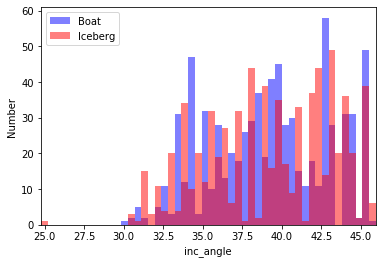

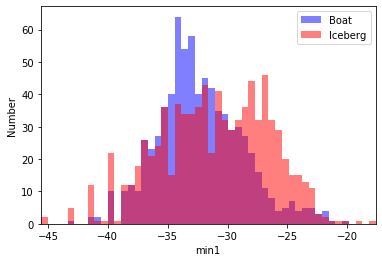

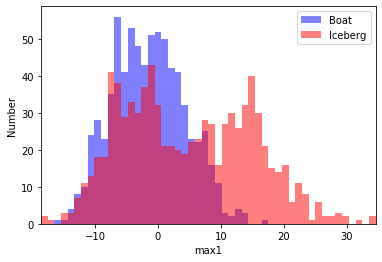

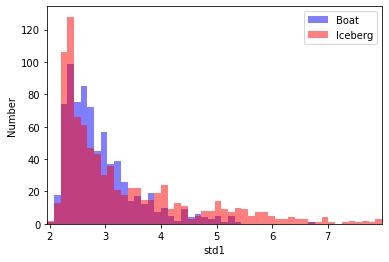

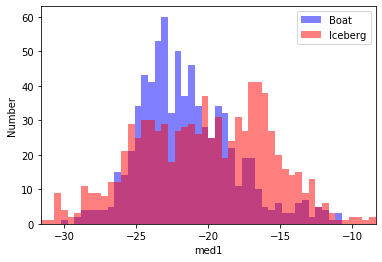

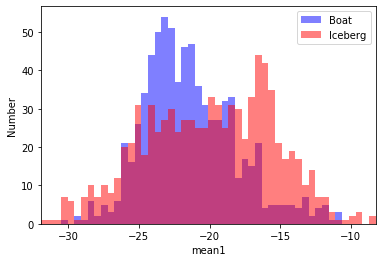

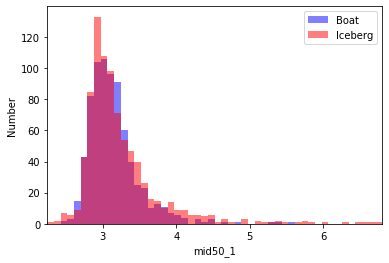

In [24]:
def plot_var(name,nbins=50):
    minval = train[name].min()
    maxval = train[name].max()
    plt.hist(train.loc[train.is_iceberg==1,name],range=[minval,maxval],
             bins=nbins,color='b',alpha=0.5,label='Boat')
    plt.hist(train.loc[train.is_iceberg==0,name],range=[minval,maxval],
             bins=nbins,color='r',alpha=0.5,label='Iceberg')
    plt.legend()
    plt.xlim([minval,maxval])
    plt.xlabel(name)
    plt.ylabel('Number')
    plt.show()
    
for col in ['inc_angle','min1','max1','std1','med1','mean1','mid50_1']:
    plot_var(col)
    

For the first band, we see that there are some significant differences. The middle 50% range has around the same size for both, but the minimum, maximum, standard deviation, median, and mean all show noticeable differences in some range of the values. Evidently, these basic variables seem to have some sensitivity to what we are trying to measure. We might expect this if, for example, icebergs are much larger than ships and thus cover more pixels.

We get similar results for the second band.

## Correlations Between Features

Now that we've established that these variables may have some use, we should look at the correlations between them. For this, I'll just plot the correlation matrix. It would also be good to look at scatter plots of each pair of variables (this can be done easily in Seaborn), but i won't do that here.

In [65]:
train_stats = train.drop(['id','is_iceberg','band_1','band_2'],axis=1)

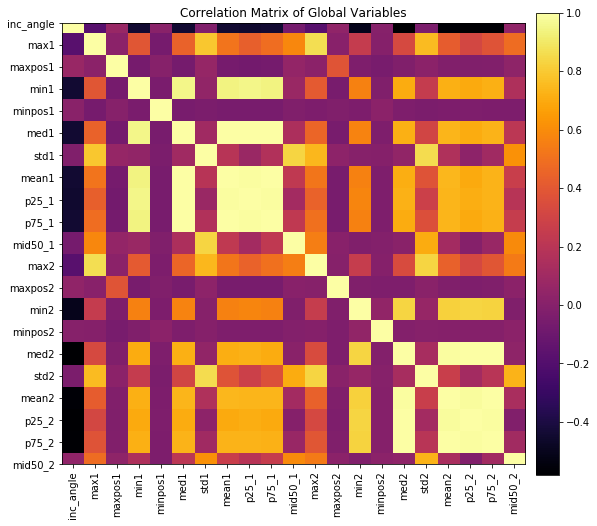

In [66]:
corr = train_stats.corr()
fig = plt.figure(1, figsize=(10,10))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(train_stats.columns))
plt.xticks(labels,train_stats.columns,rotation=90)
plt.yticks(labels,train_stats.columns)
plt.title('Correlation Matrix of Global Variables')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

We see that there are large correlations between some of the variables. In particular, the mean, median, 25% signal, and 75% signal are all closely related, with nearly 75% correlation. The min and max are also pretty highly correlated for band 1, as are the min and median for both bands, suggesting that the signals have maybe been scaled in some way to force this correlation. There are also some correlations between the two bands. Finally, we see an anticorrelation of around -0.5 between the mean of band 2 and the angle, with a weaker correlation for band 1.

# Plotting Some Images

It's good to plot some images before we do too much analysis. That way, we can get some sense of what we're looking at. The images are 75 x 75 pixels each with two bands.

In [72]:
icebergs = train[train.is_iceberg==1].sample(n=9,random_state=123)
ships = train[train.is_iceberg==0].sample(n=9,random_state=456)

## Raw Images

The first set show 9 random icebergs using band 1.

In [75]:
icebergs.iloc[0,0]['band_1']

TypeError: string indices must be integers

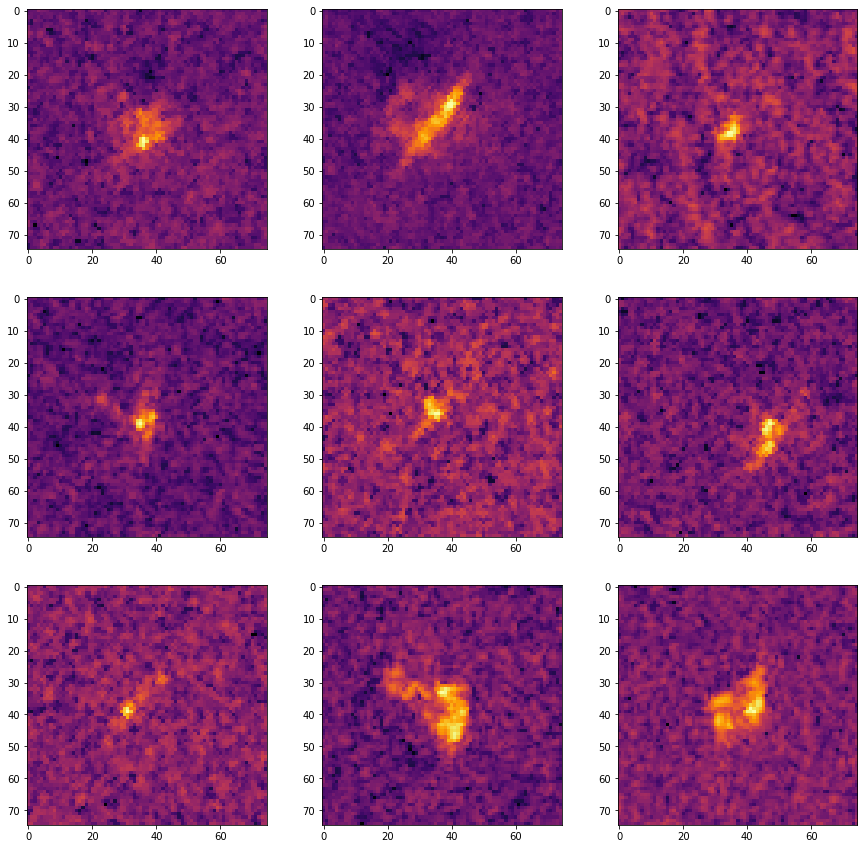

In [80]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.array(icebergs.iloc[i,1]).reshape(75,75)
    ax.imshow(arr,cmap='inferno')
    
plt.show()

The second set shows ships in band 1.

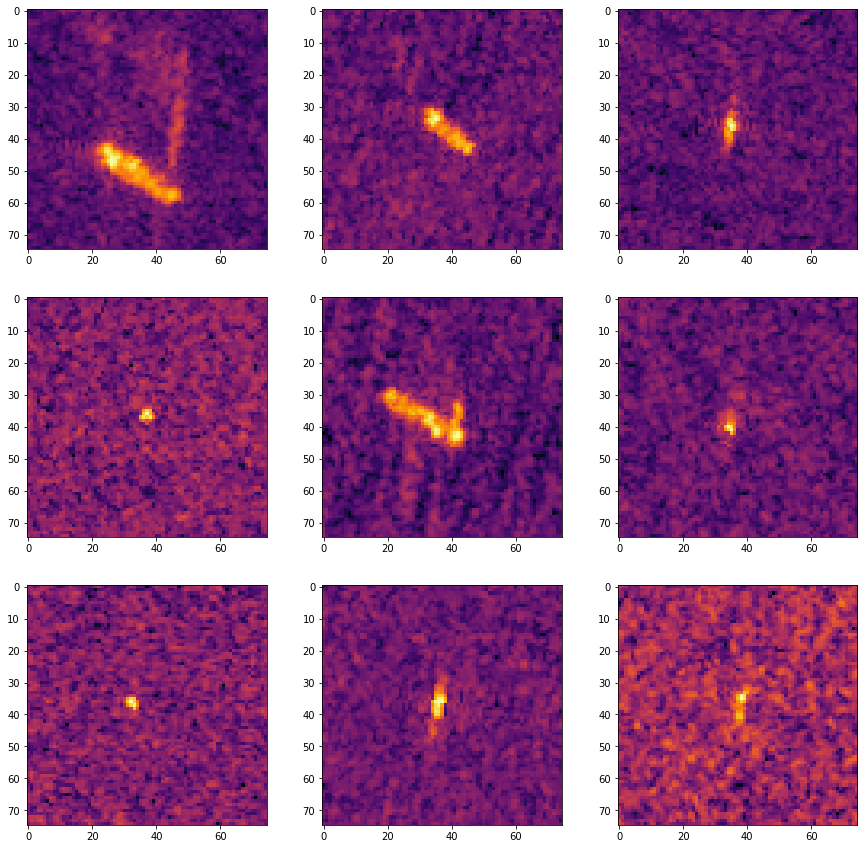

In [81]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

The next set show the same set of icebergs in band 2.

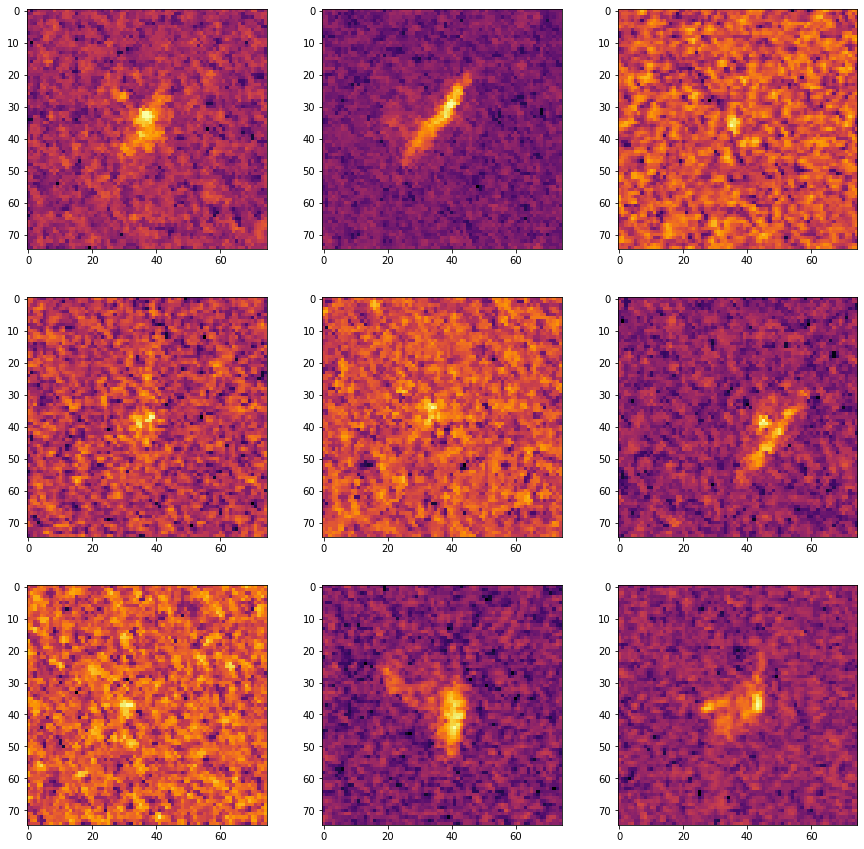

In [84]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,2]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

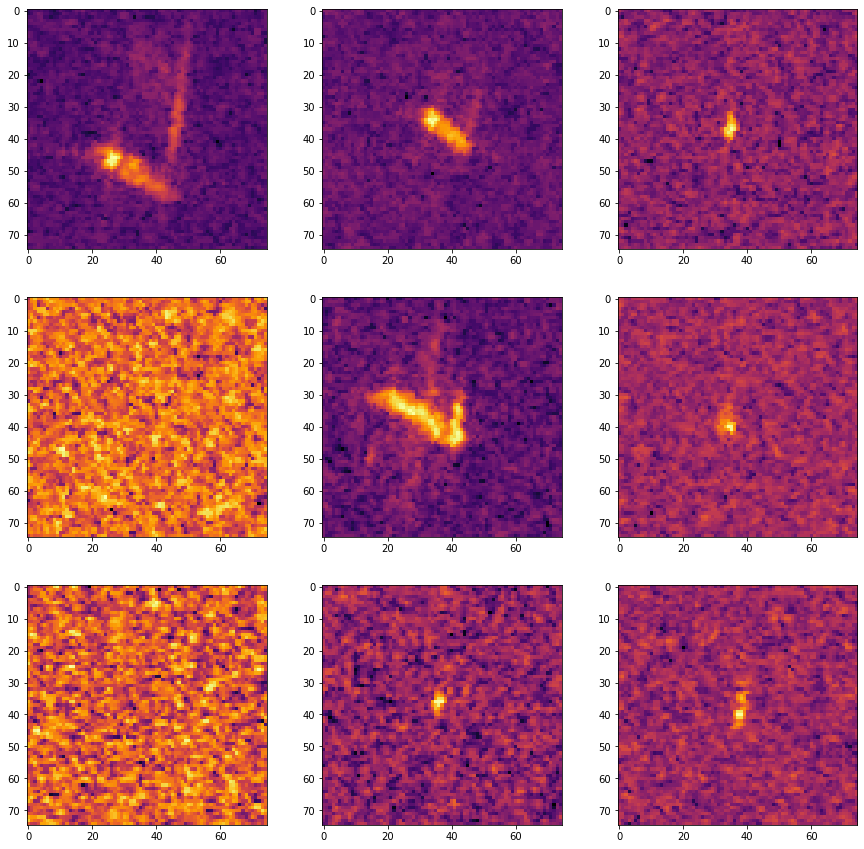

In [85]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,2]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

So, we see that everything looks pretty blob-like. It also appears that the background is not really random noise but rather has some spatial correlations. If the background is dominated by things like waves rather than noise, then spatial correlations would clearly be expected. The ships seem to have a more regular structure, with a pronounced skewness in the blobs for larger signals.

Some of these blobs are not that high above noise, and in the last set there are even two images where the signal cannot even be seen by eye, so it may be advantageous to first transform the images in some way to enhance the contrast between the signals and the background.

# Transforming the Images

I'll look at a few types of basic transforms that can be easily defined by FIR filters. The scipy convolve2d function will run a convolution of two arrays, so we just need to define the kernels. I have not optimized the kernels here, and there are many other choices of types of kernels, so you should try out different options to see what they do.